#**TUTORIAS - Sub y sobreajsute, Random Forest y Clustering**

**En aprendizaje automático, queremos que un modelo aprenda los patrones generales de los datos sin memorizar los ejemplos exactos.**

.


**Subajuste (Underfitting):**

El modelo no aprende lo suficiente, tiene baja precisión tanto en entrenamiento como en prueba.
* Causa: modelo demasiado simple o pocos datos/épocas.

**Sobreajuste (Overfitting):**

El modelo aprende demasiado bien los datos de entrenamiento (incluso el ruido).
* Causa: modelo demasiado complejo, demasiados árboles, profundidad excesiva o falta de regularización.



---



#**MODELOS CON SUBAJUSTE**

##**Subajuste con Regresion lineal**

Queremos predecir el precio de una casa según solo una característica: su tamaño (m²).
Pero en realidad, el precio depende de más variables (habitaciones, ubicación, antigüedad...).
Al usar solo una variable, el modelo no capta toda la complejidad ⇒ subajuste.

Subajuste — Regresión Lineal con una sola variable:
Error MSE (entrenamiento): 1337454998.71
Error MSE (prueba): 1823225052.64
R² (entrenamiento): 0.777
R² (prueba): 0.617


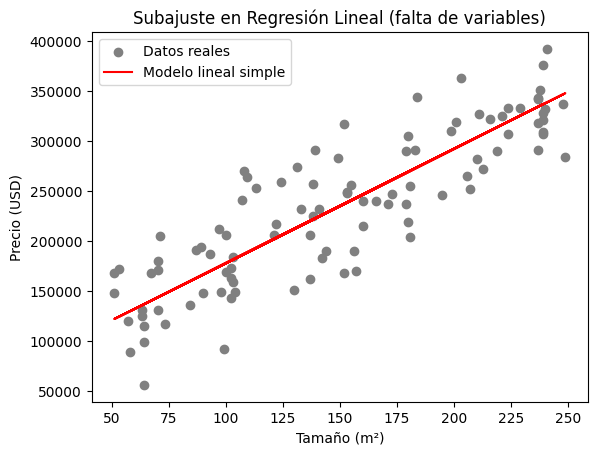

In [28]:
# SUBAJUSTE CON REGRESIÓN LINEAL

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.model_selection import train_test_split

# Generamos un dataset simulado
np.random.seed(42)

# Supongamos que el precio depende del tamaño, las habitaciones y la antigüedad
tamaño = np.random.randint(50, 250, 100)
habitaciones = np.random.randint(1, 6, 100)
antiguedad = np.random.randint(0, 30, 100)

# Generamos el precio real
precio = 50000 + tamaño*1000 + habitaciones*20000 - antiguedad*1500 + np.random.normal(0, 20000, 100)

data = pd.DataFrame({"tamaño": tamaño, "habitaciones": habitaciones, "antiguedad": antiguedad, "precio": precio})


# Subajuste intencional: solo usamos una variable
X = data[["tamaño"]]  # Dejamos fuera habitaciones y antigüedad
y = data["precio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamos el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacemos predicciones
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

# Evaluamos el modelo
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Subajuste — Regresión Lineal con una sola variable:")
print("Error MSE (entrenamiento):", round(mse_train, 2))
print("Error MSE (prueba):", round(mse_test, 2))
print("R² (entrenamiento):", round(r2_train, 3))
print("R² (prueba):", round(r2_test, 3))

# Visualización

plt.scatter(X, y, color='gray', label='Datos reales')
plt.plot(X, modelo.predict(X), color='red', label='Modelo lineal simple')
plt.title("Subajuste en Regresión Lineal (falta de variables)")
plt.xlabel("Tamaño (m²)")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()


**Correccion**


Modelo mejorado:
R² (prueba): 0.896
Error MSE (prueba): 494720022.66


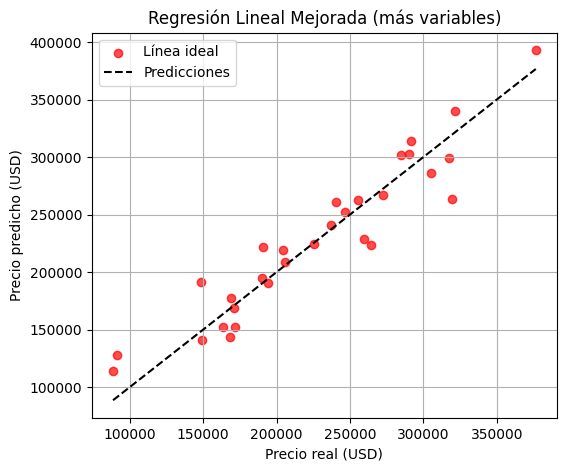

In [30]:
# Modelo corregido: incluimos todas las variables relevantes
X_mejorado = data[["tamaño", "habitaciones", "antiguedad"]]
X_train, X_test, y_train, y_test = train_test_split(X_mejorado, y, test_size=0.3, random_state=42)

modelo_mejorado = LinearRegression()
modelo_mejorado.fit(X_train, y_train)

y_test_pred_mejorado = modelo_mejorado.predict(X_test)

print("\nModelo mejorado:")
print("R² (prueba):", round(r2_score(y_test, y_test_pred_mejorado), 3))
print("Error MSE (prueba):", round(mean_squared_error(y_test, y_test_pred_mejorado), 2))


plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred_mejorado, color='red', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.title("Regresión Lineal Mejorada (más variables)")
plt.xlabel("Precio real (USD)")
plt.ylabel("Precio predicho (USD)")
plt.legend(["Línea ideal", "Predicciones"])
plt.grid(True)
plt.show()

##**Subajuste con naive bayes**

In [31]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Cargamos dataset (ejemplo con noticias)
data = fetch_20newsgroups(subset='train', categories=['sci.space', 'rec.autos'], remove=('headers','footers','quotes'))

# Subajuste: para lograrlo usamos SOLO las 5 palabras más frecuentes
vectorizer_pobre = CountVectorizer(max_features=5)  # es aqui
X = vectorizer_pobre.fit_transform(data.data)
y = data.target

# Entrenamiento
nb = MultinomialNB()
nb.fit(X, y)

# Evaluación
y_pred = nb.predict(X)
print("Exactitud (con subajuste):", round(accuracy_score(y, y_pred), 3))

# Modelo mejorado con más features
vectorizer_bueno = CountVectorizer(max_features=1000)
X2 = vectorizer_bueno.fit_transform(data.data)
nb2 = MultinomialNB()
nb2.fit(X2, y)
y_pred2 = nb2.predict(X2)
print("Exactitud (con modelo mejorado):", round(accuracy_score(y, y_pred2), 3))


Exactitud (con subajuste): 0.572
Exactitud (con modelo mejorado): 0.872


##**Subajuste con Arboles de decision**

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Subajuste intencional: aqui colocamos y una profundidad máxima 1

modelo_simple = DecisionTreeClassifier(max_depth=1, random_state=42)
modelo_simple.fit(X_train, y_train)
y_pred_simple = modelo_simple.predict(X_test)
print("Precisión (subajustado):", round(accuracy_score(y_test, y_pred_simple), 3))

# Modelo mejorado

modelo_mejor = DecisionTreeClassifier(max_depth=4, random_state=42)
modelo_mejor.fit(X_train, y_train)
y_pred_mejor = modelo_mejor.predict(X_test)
print("Precisión (mejorado):", round(accuracy_score(y_test, y_pred_mejor), 3))


Precisión (subajustado): 0.711
Precisión (mejorado): 1.0


* Subajuste ocurre porque limitamos en exceso la capacidad del árbol.
* Se mejora aumentando la profundidad.



---



#**MODELOS CON SOBREAJUSTE**

##**Ejemplo con arbol de decision**

Si no limitamos la profundidad del árbol, este puede aprender de memoria los datos de entrenamiento.

In [44]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X,y = make_classification(n_samples=200, n_features=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Creamos el arbol sin restricion maxima de profundidad , eso crea sobreajuste
tree_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_overfit.fit(X_train, y_train)

#Ver las predicciones
test_exactitud = accuracy_score(y_test, tree_overfit.predict(X_test))
train_exactitud = accuracy_score(y_train, tree_overfit.predict(X_train))

print("Exactitud en test:", round(test_exactitud, 3))
print("Exactitud en train:", round(train_exactitud, 3))

Exactitud en test: 0.833
Exactitud en train: 1.0


Solucion

In [45]:
tree_balanceado = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_balanceado.fit(X_train, y_train)

print('Exactitud en train: ', round(accuracy_score(y_train, tree_balanceado.predict(X_train)), 3))
print('Exactitud en test: ', round(accuracy_score(y_test, tree_balanceado.predict(X_test)), 3))

Exactitud en train:  0.95
Exactitud en test:  0.85


##**Ejemplo con SVM**

Si usamos un kernel muy complejo o un parámetro C muy alto, la SVM se ajusta en exceso a los datos.

Precisión train: 0.9285714285714286
Precisión test: 0.9666666666666667


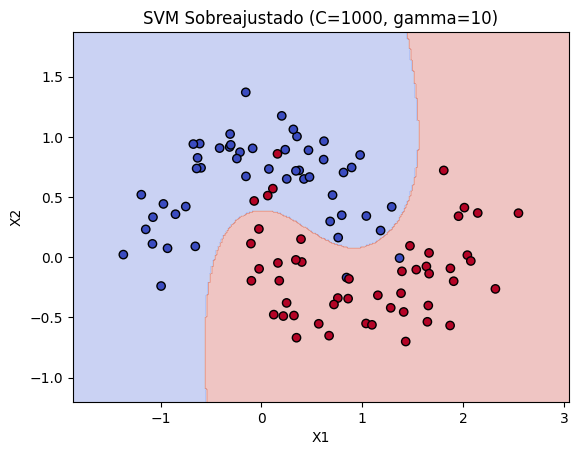

In [39]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

X, y = datasets.make_moons(noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# C muy alto => permite errores casi nulos (modelo inflexible)
svm_overfit = SVC(kernel='rbf', C=1, gamma=1)
svm_overfit.fit(X_train, y_train)

print("Precisión train:", accuracy_score(y_train, svm_overfit.predict(X_train)))
print("Precisión test:", accuracy_score(y_test, svm_overfit.predict(X_test)))

# Visualización de la frontera de decisión
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_overfit.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Sobreajustado (C=1000, gamma=10)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


solucion

In [35]:
svm_balanced = SVC(kernel='rbf', C=1, gamma=0.1)
svm_balanced.fit(X_train, y_train)

print("Precisión train:", accuracy_score(y_train, svm_balanced.predict(X_train)))
print("Precisión test:", accuracy_score(y_test, svm_balanced.predict(X_test)))


Precisión train: 0.8857142857142857
Precisión test: 0.8666666666666667




---



#**Determinación de número de Clusters**

##**Método del “Codo” (Elbow Method)**

Se basa en la inercia (suma de distancias intra-cluster).

Buscamos el punto donde agregar más clusters ya no mejora significativamente el modelo.

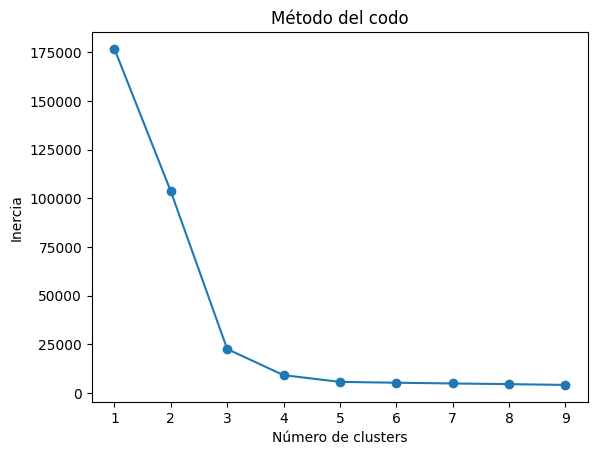

In [54]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Datos simulados
X, _ = make_blobs(n_samples=3000, centers=5, random_state=42)

inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, 'o-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')
plt.show()


El “codo” (curva que se dobla) indica el número adecuado de clusters.

Por ejemplo, si el codo está en k=5, significa que 5 grupos son razonables.

##**Método de Silhouette**



* Evalúa qué tan bien se separan los clusters:

* Valor entre -1 y 1.

* Cuanto más alto, mejor separación.

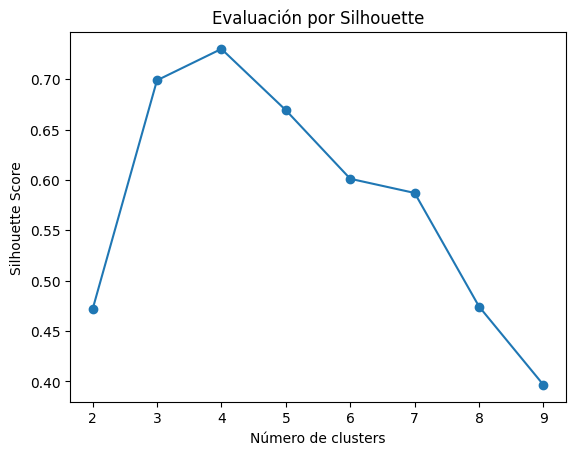

In [55]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    scores.append(silhouette_score(X, km.labels_))

plt.plot(range(2, 10), scores, 'o-')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Evaluación por Silhouette')
plt.show()


El máximo puntaje de silhouette indica el número óptimo de clusters.

##**Corte de Dendrograma (Clustering Jerárquico)**

En clustering jerárquico (como Agglomerative Clustering), los clusters se unen progresivamente.

El “corte” del dendrograma a cierta altura define cuántos grupos queremos.

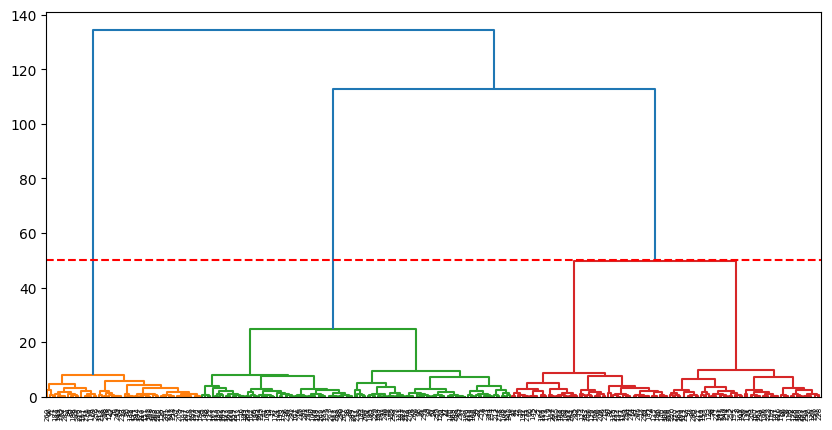

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.axhline(y=50, color='r', linestyle='--')  # ejemplo: corte a altura 50
plt.show()


Si cortamos más arriba, habrà menos grupos y más abajo, más grupos.

**Ejemplo real de uso de clustering**

* **Marketing:** agrupar clientes por comportamiento de compra (edad, gasto, frecuencia). KMeans o jerárquico para segmentar mercados.

* **Biología:** agrupar genes con patrones de expresión similares.

* **Ciberseguridad:** agrupar flujos de red para detectar comportamientos anómalos.



---



#**RANDOM FOREST - EJEMPLOS**

Random Forest es un ensamble de muchos árboles de decisión.
Cada árbol se entrena con una muestra diferente del dataset (bootstrap) y con un subconjunto aleatorio de variables.
Luego, los resultados se combinan:

* En clasificación → por votación mayoritaria.

* En regresión → por promedio.

Esto lo hace robusto, preciso y menos propenso al sobreajuste que un árbol individual.

**¿Por qué usarlo?**

* Maneja datos numéricos y categóricos.

* Tolera valores atípicos y ruido.

* Mide la importancia de cada variable.

* Es excelente cuando tienes muchos atributos o relaciones no lineales.

##**Ejemplo: Diagnóstico médico (clasificación de cáncer)**

**Contexto:**

Queremos predecir si un tumor es maligno o benigno en base a mediciones de células. Usaremos el dataset “Breast Cancer” de scikit-learn.

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Cargamos el dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Dividimos en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo
randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
randomforest.fit(X_train, y_train)

# Evaluamos
y_pred = randomforest.predict(X_test)
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Importancia de variables
importances = randomforest.feature_importances_
for name, imp in sorted(zip(data.feature_names, importances), key=lambda x: -x[1])[:5]:
    print(f"{name}: {imp:.3f}")


Exactitud: 0.9707602339181286

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

mean concave points: 0.142
worst concave points: 0.127
worst area: 0.118
mean concavity: 0.081
worst radius: 0.078


* Se usa para clasificación binaria.

* Muestra una exactitud alta (≈ 96-98%).

* La importancia de variables te dice qué rasgos celulares son más relevantes.

* Es útil en medicina porque es explicable y estable.

##**Efecto del número de árboles**

**Contexto:**

Queremos mostrar cómo el rendimiento mejora y se estabiliza al aumentar el número de árboles.

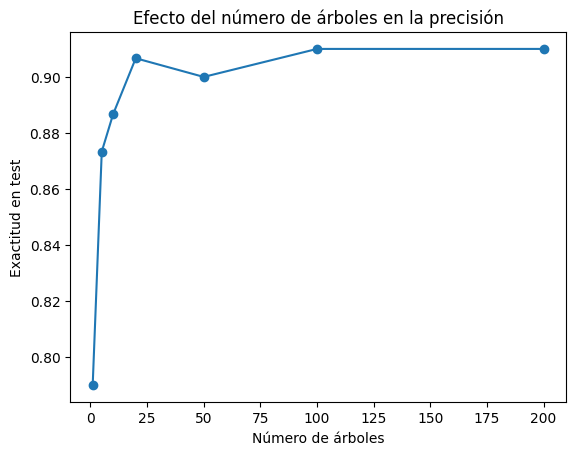

In [24]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

accuracies = []
n_trees = [1, 5, 10, 20, 50, 100, 200]

for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    accuracies.append(accuracy_score(y_test, rf.predict(X_test)))

plt.plot(n_trees, accuracies, marker="o")
plt.title("Efecto del número de árboles en la precisión")
plt.xlabel("Número de árboles")
plt.ylabel("Exactitud en test")
plt.show()


* Pocos árboles → bajo rendimiento (alta varianza).

* A medida que aumentan los árboles, la precisión se estabiliza.

* Muestra cómo Random Forest reduce el sobreajuste al promediar muchos modelos.



---



#**Que es Random State = 42?**

**random_state es un semilla aleatoria (random seed)** que controla la aleatoriedad interna de un modelo o función.

En muchas partes del aprendizaje automático hay procesos aleatorios, por ejemplo:

* Al dividir los datos en entrenamiento y prueba (train_test_split).

* Al seleccionar subconjuntos de datos en cada árbol del Random Forest.

* Al inicializar pesos en una red neuronal.

* Al barajar los datos antes de un entrenamiento.

Cada vez que ejecutamos el código, Python genera una secuencia distinta de números aleatorios y por eso, si no fijamos una semilla (random_state), cada corrida/iteracion/ejecucion del modelo puede dar resultados diferentes.

---

**Semilla aleatoria**

Una semilla aleatoria (random seed) es un número que inicializa el generador de números aleatorios de un programa.

* Los programas informáticos no pueden generar aleatoriedad “real” (como lanzar una moneda en el mundo físico), sino que generan aleatoriedad simulada mediante algoritmos llamados generadores pseudoaleatorios.

* Estos generadores crean secuencias de números que parecen aleatorios, pero que en realidad dependen de un valor inicial: la semilla.

---

###**¿Qué hace random_state en la práctica?**


Por ejemplo, cuando definimos:

    X_train, X_test = train_test_split(X, y, test_size=0.3, random_state=42)


estamos fijando una semilla de aleatoriedad, lo que garantiza que cada vez que ejecutemos el código:

* Los mismos datos irán al conjunto de entrenamiento y prueba.

* Los árboles del Random Forest crecerán con las mismas muestras.

* Los resultados serán reproducibles, es decir, iguales cada vez.

**Si cambiamos el número, obtendremos una secuencia diferente de aleatoriedad y, por tanto, resultados ligeramente distintos.**

###**¿Por qué el número 42?**


**El número 42 se ha convertido en una especie de tradición geek en la ciencia de datos y la programación.**

> El origen viene del libro “The Hitchhiker’s Guide to the Galaxy” (Douglas Adams), donde una supercomputadora llamada Deep Thought calcula que “la respuesta al sentido de la vida, el universo y todo lo demás” es 42.

Por eso, muchos programadores lo usan como una especie de “número por defecto” divertido, aunque en realidad podrías usar cualquier otro entero (por ejemplo, 0, 1, 7, 1234, etc.).

**Lo importante es mantener el mismo número si quieres que tu experimento sea reproducible.**

**Ejemplo**

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np

data = np.arange(10)

# División con semilla 42
train1, test1 = train_test_split(data, test_size=0.3, random_state=42)

# División con semilla 10
train2, test2 = train_test_split(data, test_size=0.3, random_state=15)

print("Con random_state=42:", test1)
print("Con random_state=10:", test2)


Con random_state=42: [8 1 5]
Con random_state=10: [2 6 1]
